# Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Load Data

In [2]:
pwd

'C:\\Users\\admin\\ML Datasets'

In [3]:
data = pd.read_csv('House Price Prediction\\train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

# Start NA analysis and treatment

In [6]:
res = data.isnull().sum()/data.shape[0]

In [7]:
drop_cols =res[res>0.30].index.tolist()

In [8]:
drop_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
data.drop(columns=drop_cols ,inplace=True)

In [10]:
temp =data.isnull().sum()>0

temp[temp==True].index.tolist()

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [11]:
data.loc[data.LotFrontage.isnull(),'LotFrontage']  = np.round(data.LotFrontage.mean(),0)

In [12]:
data.loc[data.MasVnrType.isnull(),'MasVnrType']  = data.MasVnrType.mode()[0]

In [13]:
data.loc[data.MasVnrArea.isnull(),'MasVnrArea']  = data.MasVnrArea.mean()

In [14]:
data.loc[data.BsmtQual.isnull(),'BsmtQual']  = data.BsmtQual.mode()[0]

In [15]:
data.loc[data.BsmtCond.isnull(),'BsmtCond']  = data.BsmtCond.mode()[0]

In [16]:
data.loc[data.BsmtExposure.isnull(),'BsmtExposure']  = data.BsmtExposure.mode()[0]

In [17]:
data.loc[data.BsmtFinType1.isnull(),'BsmtFinType1']  = data.BsmtFinType1.mode()[0]

In [18]:
data.loc[data.BsmtFinType2.isnull(),'BsmtFinType2']  = data.BsmtFinType2.mode()[0]

In [19]:
data.loc[data.Electrical.isnull(),'Electrical']  = data.Electrical.mode()[0]

In [20]:
data.loc[data.GarageType.isnull(),'GarageType']   = data.GarageType.mode()[0]

In [21]:
data.loc[data.GarageYrBlt.isnull(),'GarageYrBlt']   = data.GarageYrBlt.mode()[0]

In [22]:
data.loc[data.GarageFinish.isnull(),'GarageFinish']   = data.GarageFinish.mode()[0]

In [23]:
data.loc[data.GarageQual.isnull(),'GarageQual'] = data.GarageQual.mode()[0]

In [24]:
data.loc[data.GarageCond.isnull(),'GarageCond']  = data.GarageCond.mode()[0]

In [25]:
data.isnull().sum().any()

False

# Feature Engineering on y column

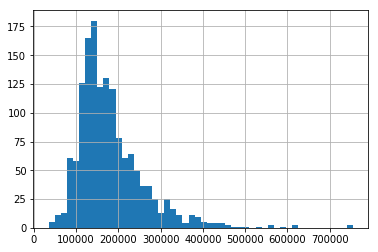

In [26]:
data.SalePrice.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D09916208>,
      dtype=object)

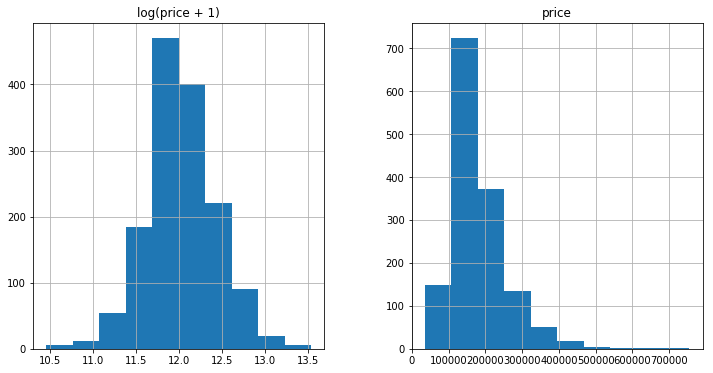

In [27]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":data["SalePrice"], "log(price + 1)":np.log1p(data["SalePrice"])})
prices.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D09A0AFD0>,
      dtype=object)

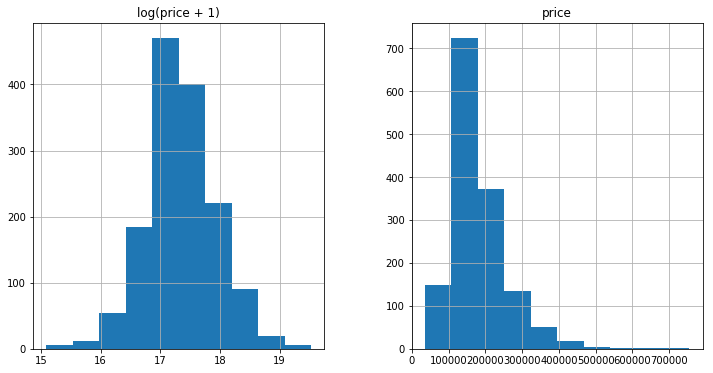

In [28]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":data["SalePrice"], "log(price + 1)":np.log2(data["SalePrice"])})
prices.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D09A573C8>,
      dtype=object)

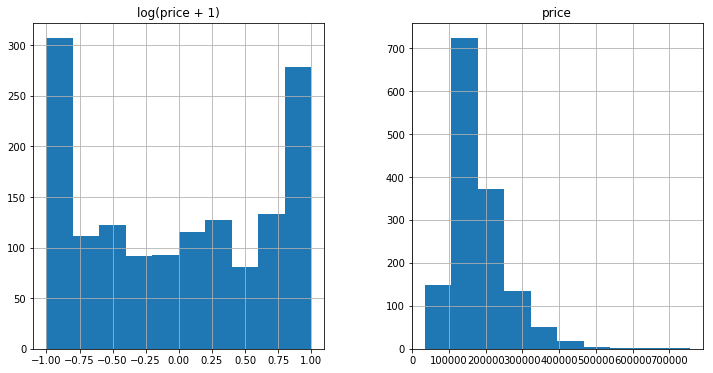

In [29]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":data["SalePrice"], "log(price + 1)":np.sin(data["SalePrice"])})
prices.hist()

# Splitting Data into Train and Test

In [30]:
X = data[data.columns.difference(['SalePrice'])]
y = data.SalePrice

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=0.3)

In [32]:
X_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [33]:
X_train.shape

(1022, 75)

In [34]:
print(X_train.dtypes)

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtQual          object
BsmtUnfSF          int64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fireplaces         int64
Foundation        object
FullBath           int64
Functional        object
GarageArea         int64
GarageCars         int64
                  ...   
LotArea            int64
LotConfig         object
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object


In [35]:
print(X_train.select_dtypes(['int64','float64']).columns.tolist())

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


In [36]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[X_train.select_dtypes(['int64','float64']).columns.tolist()] = scaler.fit_transform(X_train[X_train.select_dtypes(['int64','float64']).columns.tolist()])


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
376,0.133089,0.0,0.0,0.250,1Fam,TA,Av,0.052799,0.0,GLQ,...,WD,0.0,Pave,0.250000,0.142390,AllPub,0.000000,0.898551,0.766667,0.00
250,0.223038,0.0,0.0,0.375,1Fam,TA,No,0.000000,0.0,Unf,...,WD,0.0,Pave,0.333333,0.119149,AllPub,0.306884,0.492754,0.266667,1.00
228,0.132630,0.0,0.0,0.375,1Fam,TA,No,0.149185,0.0,ALQ,...,WD,0.0,Pave,0.250000,0.149264,AllPub,0.000000,0.688406,0.283333,1.00
40,0.227168,0.0,0.0,0.375,1Fam,TA,No,0.113926,0.0,Rec,...,WD,0.0,Pave,0.333333,0.178069,AllPub,0.000000,0.673913,0.250000,0.00
428,0.200551,0.0,0.0,0.250,1Fam,TA,No,0.117647,0.0,GLQ,...,New,0.0,Pave,0.333333,0.197709,AllPub,0.122520,0.978261,0.950000,0.25


In [38]:
X_test[X_test.select_dtypes(['int64','float64']).columns.tolist()] = scaler.fit_transform(X_test[X_test.select_dtypes(['int64','float64']).columns.tolist()])
X_test.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
147,0.238917,0.633113,0.0,0.6,1Fam,TA,No,0.000000,0.0,Unf,...,WD,0.0,Pave,0.555556,0.275733,AllPub,0.250871,0.937984,0.864407,1.0
676,0.337378,0.373487,0.0,0.8,1Fam,Fa,No,0.000000,0.0,Unf,...,WD,0.0,Pave,0.555556,0.341547,AllPub,0.000000,0.155039,0.000000,0.0
1304,0.281848,0.402640,0.0,0.6,TwnhsE,TA,No,0.000000,0.0,Unf,...,WD,0.0,Pave,0.444444,0.304429,AllPub,0.000000,0.961240,0.915254,0.0
1372,0.343444,0.544004,0.0,0.6,1Fam,TA,Av,0.512080,0.0,GLQ,...,WD,0.0,Pave,0.555556,0.345602,AllPub,0.440767,0.914729,0.813559,0.0
1427,0.315446,0.280528,0.0,0.6,1Fam,TA,No,0.304622,0.0,BLQ,...,WD,0.0,Pave,0.333333,0.284779,AllPub,0.000000,0.503876,0.000000,0.5


In [39]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [40]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
376,0.133089,0.0,0.0,0.250,0.052799,0.0,0.0,0.0,0.244863,0.0,...,0,0,0,0,0,1,0,1,1,0
250,0.223038,0.0,0.0,0.375,0.000000,0.0,0.0,0.0,0.311644,0.0,...,0,0,0,0,0,1,0,1,1,0
228,0.132630,0.0,0.0,0.375,0.149185,0.0,0.0,0.0,0.029966,0.0,...,0,0,0,0,0,1,0,1,1,0
40,0.227168,0.0,0.0,0.375,0.113926,0.0,0.0,0.0,0.190497,0.0,...,0,0,0,0,0,1,0,1,1,0
428,0.200551,0.0,0.0,0.250,0.117647,0.0,0.5,0.0,0.232877,0.0,...,0,0,0,1,0,0,0,1,1,0


In [41]:
X_test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleCondition_Partial,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub
147,0.238917,0.633113,0.0,0.6,0.000000,0.0,0.000000,0.0,0.492479,0.000000,...,0,0,0,0,0,0,1,0,1,1
676,0.337378,0.373487,0.0,0.8,0.000000,0.0,0.333333,0.0,0.610028,0.283019,...,0,0,0,0,0,0,1,0,1,1
1304,0.281848,0.402640,0.0,0.6,0.000000,0.0,0.000000,0.0,0.543733,0.000000,...,0,0,0,0,0,0,1,0,1,1
1372,0.343444,0.544004,0.0,0.6,0.512080,0.0,0.333333,0.0,0.074095,0.000000,...,0,0,0,0,0,0,1,0,1,1
1427,0.315446,0.280528,0.0,0.6,0.304622,0.0,0.333333,0.0,0.185515,0.000000,...,0,0,0,0,0,0,1,0,1,1


# Start Modeling

In [42]:
X_train.shape

(1022, 266)

In [43]:
X_test.shape

(438, 247)

In [44]:
common_columns = list((set(X_train.columns.tolist()).intersection(set(X_test.columns.tolist()))))

In [45]:
len(common_columns)

242

In [46]:
X_train = X_train[common_columns]
X_test = X_test[common_columns]

In [47]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
pred = linreg.predict(X_test)

In [49]:
pred_ = linreg.predict(X_train)

In [50]:
from sklearn.metrics import r2_score

print(r2_score(y_test,pred))


-4.92437318709406e+20


In [51]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,pred))

2.8258299365084006e+30


In [52]:
from sklearn.metrics import r2_score

print('Train Data:',r2_score(y_train,pred_))

print('Test Data:',r2_score(y_test,pred))

Train Data: 0.9121734074801255
Test Data: -4.92437318709406e+20


In [53]:
import statsmodels.formula.api as sm

In [54]:
### Building the Optimal Model Using Backward Elimination


X_opt = X_train
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     38.94
Date:                Tue, 29 Jan 2019   Prob (F-statistic):          1.30e-318
Time:                        15:32:34   Log-Likelihood:                -11757.
No. Observations:                1022   AIC:                         2.395e+04
Df Residuals:                     806   BIC:                         2.501e+04
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
RoofStyle_Flat         9.723e+04   2.91e+04      3.341      0.001    4.01e+04    1.54e+05
Neighborhood_Blueste  -1.055e+04   2.72e+04     -0.388      0.698    -6.4e+04    4.29e+04
Condition1_Feedr       3905.5184   2.11e+04      0.185      0.853   -3.75e+04    4.53e+04
Neighborhood_Timber   -9801.8630   6447.124     -1.520      0.129   -2.25e+04    2853.272
BsmtHalfBath           5195.3369   8877.580      0.585      0.559   -1.22e+04    2.26e+04
Condition1_PosA        1.359e+04   2.44e+04      0.557      0.578   -3.43e+04    6.15e+04
LandContour_Bnk       -3.157e+04   6088.591     -5.184      0.000   -4.35e+04   -1.96e+04
Foundation_CBlock     -4215.5371   5818.816     -0.724      0.469   -1.56e+04    7206.284
BsmtFullBath           1.178e+04   5640.763      2.088      0.037     708.366    2.29e+04
Condition1_Artery       998.3689   2.16e+04      0.046      0.963   -4.13e+04    4.33e+04
ExterCond_Ex           7.028e+04   4.15e+04      1.692      0.091   -1.12e+04    1.52e+05
SaleCondition_Normal  -5533.9554   5987.412     -0.924      0.356   -1.73e+04    6218.805
GarageFinish_Fin       -2.04e+04   5799.542     -3.518      0.000   -3.18e+04   -9016.674
MSSubClass            -1.942e+04   2.04e+04     -0.950      0.342   -5.96e+04    2.07e+04
LotShape_IR2          -3860.7822   6877.745     -0.561      0.575   -1.74e+04    9639.623
Functional_Min1       -1.223e+04   7827.269     -1.562      0.119   -2.76e+04    3134.450
Exterior1st_CemntBd   -5302.2492   5.23e+04     -0.101      0.919   -1.08e+05    9.73e+04
HouseStyle_2.5Unf     -1.293e+04    1.5e+04     -0.864      0.388   -4.23e+04    1.64e+04
ExterCond_Fa           2.458e+04   3.35e+04      0.733      0.464   -4.12e+04    9.04e+04
ExterCond_Gd           2.431e+04    3.3e+04      0.737      0.461   -4.04e+04    8.91e+04
Heating_Grav           2.699e+04   3.83e+04      0.705      0.481   -4.82e+04    1.02e+05
MSZoning_FV            2.909e+04   1.66e+04      1.752      0.080   -3499.405    6.17e+04
BsmtFinSF2             8934.2512   1.66e+04      0.538      0.591   -2.37e+04    4.15e+04
HouseStyle_1.5Unf      1.515e+04   1.08e+04      1.403      0.161   -6038.893    3.63e+04
LandContour_HLS       -3097.1685   6301.383     -0.492      0.623   -1.55e+04    9271.889
GarageArea            -2.871e+04   1.64e+04     -1.751      0.080   -6.09e+04    3479.955
BsmtFinType1_LwQ      -1.121e+04   4717.972     -2.376      0.018   -2.05e+04   -1951.105
Exterior1st_Plywood   -1.111e+04   4.64e+04     -0.240      0.811   -1.02e+05       8e+04
BsmtCond_Fa           -1.443e+04   3.96e+04     -0.365      0.715   -9.21e+04    6.32e+04
ExterQual_Gd          -1.726e+04   6532.752     -2.642      0.008   -3.01e+04   -4436.938
CentralAir_N          -3.474e+04   8748.270     -3.971      0.000   -5.19e+04   -1.76e+04
KitchenAbvGr          -

In [55]:
category_cols = data[data.columns.difference(['SalePrice'])].select_dtypes(include=['object']).columns.tolist()

for i in category_cols:
    if len(data[i].unique())>10:
        print(data[i].unique())

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


### Check correlation with y

In [56]:
corr_df = data.corr()

In [57]:
for index,rows in corr_df.iterrows():
    for i in rows.index.tolist():
        if index != i and abs(rows[i])>0.5:
            print(index ,'=>',i,":",rows[i])

OverallQual => YearBuilt : 0.572322768962362
OverallQual => YearRemodAdd : 0.550683924194174
OverallQual => TotalBsmtSF : 0.5378084986123927
OverallQual => GrLivArea : 0.5930074300286511
OverallQual => FullBath : 0.5505997093682552
OverallQual => GarageCars : 0.6006707165907189
OverallQual => GarageArea : 0.5620217566126064
OverallQual => SalePrice : 0.7909816005838047
YearBuilt => OverallQual : 0.572322768962362
YearBuilt => YearRemodAdd : 0.5928549763436497
YearBuilt => GarageYrBlt : 0.7000980209810592
YearBuilt => GarageCars : 0.5378500917111045
YearBuilt => SalePrice : 0.5228973328794967
YearRemodAdd => OverallQual : 0.550683924194174
YearRemodAdd => YearBuilt : 0.5928549763436497
YearRemodAdd => GarageYrBlt : 0.5713688774711373
YearRemodAdd => SalePrice : 0.5071009671113867
BsmtFinSF1 => TotalBsmtSF : 0.5223960519923907
BsmtFinSF1 => BsmtFullBath : 0.6492117535742737
TotalBsmtSF => OverallQual : 0.5378084986123927
TotalBsmtSF => BsmtFinSF1 : 0.5223960519923907
TotalBsmtSF => 1stFl

In [ ]:
# SalePrice => OverallQual : 0.7909816005838047
# SalePrice => YearBuilt : 0.5228973328794967
# SalePrice => YearRemodAdd : 0.5071009671113867
# SalePrice => TotalBsmtSF : 0.6135805515591944
# SalePrice => 1stFlrSF : 0.6058521846919166
# SalePrice => GrLivArea : 0.7086244776126511
# SalePrice => FullBath : 0.5606637627484452
# SalePrice => TotRmsAbvGrd : 0.5337231555820238
# SalePrice => GarageCars : 0.640409197258349
# SalePrice => GarageArea : 0.6234314389183598
    
# ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']

#### Categorical columns with large number of categories will be removed

In [58]:
category_cols_list = data.select_dtypes(['object']).columns.tolist()
drop_cols_list = []


for j in category_cols_list:
    if len(data[j].unique()) > 10:
        drop_cols_list.append(j)
        
model2_df = data.drop(columns=drop_cols_list)

In [74]:
drop_cols_list

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [59]:
model2_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenP

#### Numeric columns correlation with Y less than 0.1 will be removed.

In [60]:
temp_cols = model2_df.columns

drp_cols1=[]

for i in temp_cols:
    if model2_df[i].dtype in ['int64','float64']:
        col_corr = model2_df[i].corr(model2_df.SalePrice)
        if abs(col_corr)<0.1:
            drp_cols1.append(i)
            
print(drp_cols1)

model2_df = model2_df.drop(columns=drp_cols1)
            
#     print(model2_df[i].dtype)


['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [61]:
model2_df.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

#### Building model 2 

In [62]:
X_2 = pd.get_dummies(model2_df[model2_df.columns.difference(['SalePrice'])])
y_2 = model2_df.SalePrice

from sklearn.model_selection import train_test_split

X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(X_2,y_2,random_state=123,test_size=0.3)


In [63]:
X_2.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath',
       'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'Street_Grvl', 'Street_Pave',
       'Utilities_AllPub', 'Utilities_NoSeWa'],
      dtype='object', length=204)

In [64]:
from sklearn.linear_model import LinearRegression

linreg2 = LinearRegression()

linreg2.fit(X_2_train,y_2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
pred2 = linreg2.predict(X_2_test)

In [66]:
pred2_train = linreg2.predict(X_2_train)

In [67]:
from sklearn.metrics import r2_score

print('Train Data:',r2_score(y_2_train,pred2_train))

print('Test Data:',r2_score(y_2_test,pred2))

Train Data: 0.915006731816193
Test Data: 0.8772576344663546


### Ridge Regression

In [68]:
from sklearn.linear_model import Ridge

In [69]:
## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_2_train,y_2_train)

pred2_ridge = ridgeReg.predict(X_2_test)

In [70]:
pred2_ridge_train = ridgeReg.predict(X_2_train)

In [71]:
from sklearn.metrics import r2_score

print('Train Data:',r2_score(y_2_train,pred2_train))

print('Test Data:',r2_score(y_2_test,pred2_ridge))

Train Data: 0.915006731816193
Test Data: 0.884795818754864


### Lasso

In [72]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_2_train,y_2_train)

lasso_test_pred = lassoReg.predict(X_2_test)

lasso_train_pred = lassoReg.predict(X_2_train)



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [73]:
from sklearn.metrics import r2_score

print('Train Data:',r2_score(y_2_train,lasso_train_pred))

print('Test Data:',r2_score(y_2_test,lasso_test_pred))

Train Data: 0.9149998199849368
Test Data: 0.88335813513888
